In [1]:
import numpy as np
import scanpy as sc
import anndata
sc.settings.verbosity = 2
from readcount_tools import get_tag
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from readcount_tools import PAPER_CONTEXT, PAGEWIDTH_IN, POINTSIZE_HIGHLIGHT,POINTSIZE_SMALL,SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE,LINEWIDTH,POINTSIZE,TICKLENGTH,LEGEND_FONTSIZE,SPINEWIDTH,LETTER_LOC_X,LETTER_LOC_Y

In [2]:
theta_umi = 100
n_hvgs = 3000
n_comps = 1000
alphas = [50,199,1]

In [3]:
#load
path = 'data/tasic/simulations/adata_sim_thetaUMI_100_GeomZ'
adata_sim = anndata.read_h5ad(path+'_processed.h5ad')
path_only_marker_genes_DE = 'data/tasic/simulations/adata_sim_only_marker_genes_DE_thetaUMI_100_GeomZ'
adata_sim_only_marker_genes_DE = anndata.read_h5ad(path_only_marker_genes_DE+'_processed.h5ad')

tcmalloc: large alloc 2920775680 bytes == 0x41938000 @ 
tcmalloc: large alloc 2920775680 bytes == 0xefab0000 @ 
tcmalloc: large alloc 2920775680 bytes == 0x19e50e000 @ 
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
tcmalloc: large alloc 2913533952 bytes == 0x2e5d06000 @ 
tcmalloc: large alloc 2913533952 bytes == 0x393f96000 @ 
tcmalloc: large alloc 2913533952 bytes == 0x441a26000 @ 
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
def mean_resvar_plot(adata,ax,alpha,xlims,ylims,set_title=False,set_xlabel=False,set_ylabel=False):
    
    marker_idx = adata.var['marker_idx'].values
    

    tag = get_tag(alpha,theta_umi)
    ax.scatter(adata.var["means"],adata.var[tag+"_var"],s=POINTSIZE_SMALL,lw=0,rasterized=True)
    ax.scatter(adata.var["means"][marker_idx],adata.var[tag+"_var"][marker_idx],s=POINTSIZE_HIGHLIGHT,lw=1,c='tab:red',rasterized=True)
    ax.hlines(1,xlims[0],xlims[1],label='Residual variance = 1',colors='k',lw=LINEWIDTH/2)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)

    
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_yticks([1,100])
    ax.minorticks_off()
    if set_title:
        ax.set_title(fr"$\alpha=${alpha}  $\theta=${theta_umi}")
    if set_xlabel:
        ax.set_xlabel('Mean expression (read counts)')
    if set_ylabel:
        ax.set_ylabel('Residual variance')
        


In [5]:
def plot_tsne(adata,ax,alpha):

    tsne = adata.obsm[f'tsne_{get_tag(alpha=alpha,theta=100)}']
    label = fr"$\alpha={alpha}$, $\theta=100$"
    ax.scatter(*tsne.T,linewidth=0,s=POINTSIZE,c=adata.obs['clustercolor'],rasterized=True)
    ax.axis('off')
    ax.set_aspect('equal')


In [6]:
adatas = [adata_sim, adata_sim_only_marker_genes_DE]
xlims = [np.min([np.min(ad.var['means']) for ad in adatas]),
         np.max([np.max(ad.var['means']) for ad in adatas])]

all_resvars = np.concatenate([np.concatenate([adata_sim.var[f'{get_tag(alpha,theta_umi)}_var'].values for alpha in alphas]) for ad in adatas])
ylims = [np.min(all_resvars),np.max(all_resvars)*1.25]

### Figure S9

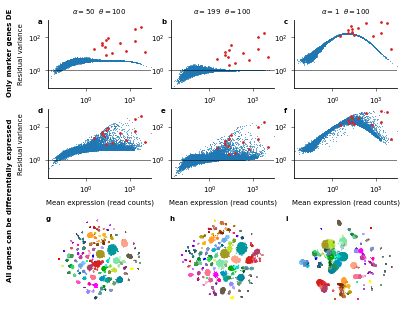

In [7]:
ncols = 3
nrows = 3
panelsize_tsne_in = PAGEWIDTH_IN/ncols
panelheight_resvar_in = panelsize_tsne_in/2
figheight_in = panelsize_tsne_in + panelheight_resvar_in*3

path='figures/S_tasic_simulation.pdf'

with mpl.rc_context(PAPER_CONTEXT):

    fig = plt.figure(figsize=(PAGEWIDTH_IN,figheight_in))

    nrows_grid = 16
    ncols_grid = 3
    axes_resvar1 = [plt.subplot2grid(shape=(nrows_grid,ncols_grid), loc=(0, col),          colspan=1,rowspan=4) for col in range(ncols_grid)]
    axes_resvar2 = [plt.subplot2grid(shape=(nrows_grid,ncols_grid), loc=(5, col),          colspan=1,rowspan=4) for col in range(ncols_grid)]
    axes_tsne = [plt.subplot2grid(shape=(nrows_grid,ncols_grid), loc=(11, col),          colspan=1,rowspan=5) for col in range(ncols_grid)]

    
    ##top row
    for icol,(ax,alpha) in enumerate(zip(axes_resvar1,alphas)):
        if icol==0:
            set_ylabel=True
            ax.text(-0.4,-0.1,'Only marker genes DE',rotation=90,fontweight='bold',fontsize=MEDIUM_SIZE,transform=ax.transAxes)
        else:
            set_ylabel=False
            
        mean_resvar_plot(adata_sim_only_marker_genes_DE,ax,alpha,xlims=xlims,ylims=ylims,
                         set_ylabel=set_ylabel,set_title=True)
        
        
    #middle row
    for icol,(ax,alpha) in enumerate(zip(axes_resvar2,alphas)):
        if icol==0:
            set_ylabel=True
            ax.text(-0.4,-1.5,'All genes can be differentially expressed',rotation=90,fontweight='bold',fontsize=MEDIUM_SIZE,transform=ax.transAxes)
        else:
            set_ylabel=False
            
        mean_resvar_plot(adata_sim,ax,alpha,xlims=xlims,ylims=ylims,
                         set_ylabel=set_ylabel,set_xlabel=True)
    
    for icol,(ax,alpha) in enumerate(zip(axes_tsne,alphas)):
        plot_tsne(adata_sim,ax,alpha)
    
    sns.despine()
    
    letters=['a','b','c',
             'd','e','f',
             'g','h','i']
    for ax,letter, in zip(np.concatenate((axes_resvar1, axes_resvar2, axes_tsne)),letters):
        ax.text(LETTER_LOC_X+0.2,LETTER_LOC_Y+0,letter,transform=ax.transAxes,fontweight='bold')
        
    fig.savefig(path, dpi=300, format=None, bbox_inches = 'tight', pad_inches = 0)